# iHESP 

`Labrador Coast Domain`

#### Libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.path as mpath
import matplotlib.cm as cm
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import cartopy.mpl.gridliner as gridliner
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="All-NaN slice encountered")
%matplotlib inline
import time

In [2]:
start_time=time.time()

path = '/Users/thomas/Desktop/Research/Data Analysis/iHESP/iHESP/'


dh = xr.open_dataset(path+'ice_hist.nc')
dp = xr.open_dataset(path+'ice_proj.nc')
end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 12.277374029159546 seconds


### Sea Ice Extent

In [4]:
aice_hist=dh['aice']
aice_proj=dp['aice']

tarea_hist=dh['uarea']
tarea_proj=dp['uarea']

In [5]:
# Define the Labrador coast boundaries (replace these with your desired region)
lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69


# Create a mask for Labrador coast 
mask_hist = ((aice_hist.TLAT >= lat_min) & (aice_hist.TLAT <= lat_max) &
        (aice_hist.TLON >= lon_min) & (aice_hist.TLON <= lon_max))

mask_hist2 = ((tarea_hist.TLAT >= lat_min) & (tarea_hist.TLAT <= lat_max) &
        (tarea_hist.TLON >= lon_min) & (tarea_hist.TLON <= lon_max))

mask_proj = ((aice_proj.TLAT >= lat_min) & (aice_proj.TLAT <= lat_max) &
        (aice_proj.TLON >= lon_min) & (aice_proj.TLON <= lon_max))

mask_proj2 = ((tarea_proj.TLAT >= lat_min) & (tarea_proj.TLAT <= lat_max) &
        (tarea_proj.TLON >= lon_min) & (tarea_proj.TLON <= lon_max))

# Apply the mask to the aice variable
aice_hist_region_ =aice_hist.where(mask_hist, drop=True)
tarea_hist_region_=tarea_hist.where(mask_hist2, drop=True)
aice_proj_region_ =aice_proj.where(mask_proj, drop=True)
tarea_proj_region_=tarea_proj.where(mask_proj2, drop=True)

In [21]:
sic_greater_15hist = xr.where(aice_hist_region_ >= 15, 1, 0)
sic_greater_15proj = xr.where(aice_proj_region_ >= 15, 1, 0)

aice_hist_region = (sic_greater_15hist * tarea_hist_region_)/1e12
aice_proj_region = (sic_greater_15proj * tarea_proj_region_)/1e12

In [25]:
aice_1850_59=aice_hist_region.sel(time=slice('1850-02-01','1859-12-31'))
aice_1860_69=aice_hist_region.sel(time=slice('1860-01-01','1869-12-31'))
aice_1870_79=aice_hist_region.sel(time=slice('1870-01-01','1879-12-31'))
aice_1880_89=aice_hist_region.sel(time=slice('1880-01-01','1889-12-31'))
aice_1890_99=aice_hist_region.sel(time=slice('1890-01-01','1899-12-31'))
aice_1900_09=aice_hist_region.sel(time=slice('1900-01-01','1909-12-31'))
aice_1910_19=aice_hist_region.sel(time=slice('1910-01-01','1919-12-31'))
aice_1920_29=aice_hist_region.sel(time=slice('1920-01-01','1929-12-31'))
aice_1930_39=aice_hist_region.sel(time=slice('1930-01-01','1939-12-31'))
aice_1940_49=aice_hist_region.sel(time=slice('1940-01-01','1949-12-31'))
aice_1950_59=aice_hist_region.sel(time=slice('1950-01-01','1959-12-31'))
aice_1960_69=aice_hist_region.sel(time=slice('1960-01-01','1969-12-31'))
aice_1970_79=aice_hist_region.sel(time=slice('1970-01-01','1979-12-31'))
aice_1980_89=aice_hist_region.sel(time=slice('1980-01-01','1989-12-31'))
aice_1990_99=aice_hist_region.sel(time=slice('1990-01-01','1999-12-31'))
aice_2000_06=aice_hist_region.sel(time=slice('2000-01-01','2006-12-31'))
aice_2007_09=aice_proj_region.sel(time=slice('2007-01-01','2009-12-31'))

aice_2000_09 = xr.concat([aice_2000_06, aice_2007_09], dim='time')

aice_2010_19=aice_proj_region.sel(time=slice('2010-01-01','2019-12-31'))
aice_2020_29=aice_proj_region.sel(time=slice('2020-01-01','2029-12-31'))
aice_2030_39=aice_proj_region.sel(time=slice('2030-01-01','2039-12-31'))
aice_2040_49=aice_proj_region.sel(time=slice('2040-01-01','2049-12-31'))
aice_2050_59=aice_proj_region.sel(time=slice('2050-01-01','2059-12-31'))
aice_2060_69=aice_proj_region.sel(time=slice('2060-01-01','2069-12-31'))
aice_2070_79=aice_proj_region.sel(time=slice('2070-01-01','2079-12-31'))
aice_2080_89=aice_proj_region.sel(time=slice('2080-01-01','2089-12-31'))
aice_2090_100=aice_proj_region.sel(time=slice('2090-01-01','2100-12-31'))

In [26]:

aice_1850_59_monthly = aice_1850_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1860_69_monthly = aice_1860_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1870_79_monthly = aice_1870_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1880_89_monthly = aice_1880_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1890_99_monthly = aice_1890_99.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1900_09_monthly = aice_1900_09.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1910_19_monthly = aice_1910_19.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1920_29_monthly = aice_1920_29.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1930_39_monthly = aice_1930_39.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1940_49_monthly = aice_1940_49.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1950_59_monthly = aice_1950_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1960_69_monthly = aice_1960_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1970_79_monthly = aice_1970_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1980_89_monthly = aice_1980_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1990_99_monthly = aice_1990_99.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2000_09_monthly = aice_2000_09.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2010_19_monthly = aice_2010_19.groupby('time.month').mean('time').sum(('nj','ni'))

aice_2020_29_monthly = aice_2020_29.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2030_39_monthly = aice_2030_39.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2040_49_monthly = aice_2040_49.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2050_59_monthly = aice_2050_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2060_69_monthly = aice_2060_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2070_79_monthly = aice_2070_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2080_89_monthly = aice_2080_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2090_100_monthly = aice_2090_100.groupby('time.month').mean('time').sum(('nj','ni'))


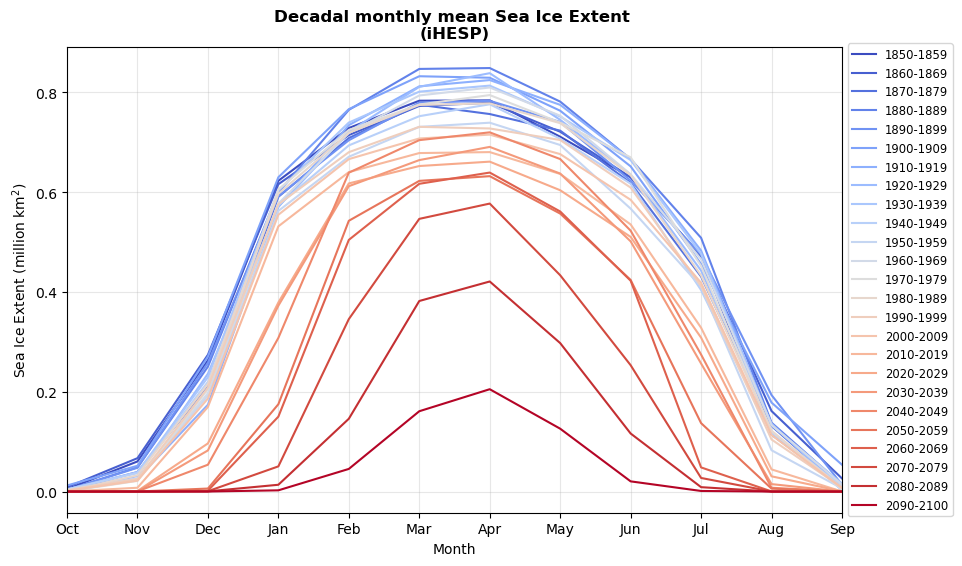

In [40]:
# Set xticks to represent months from January to December
fig,ax=plt.subplots(figsize=(10,6.05))
all_data = [aice_1850_59_monthly,aice_1860_69_monthly,aice_1870_79_monthly,aice_1880_89_monthly,aice_1890_99_monthly,
            aice_1900_09_monthly,aice_1910_19_monthly,aice_1920_29_monthly,aice_1930_39_monthly,aice_1940_49_monthly,
            aice_1950_59_monthly,aice_1960_69_monthly,aice_1970_79_monthly,aice_1980_89_monthly,aice_1990_99_monthly,
            aice_2000_09_monthly,aice_2010_19_monthly,aice_2020_29_monthly,aice_2030_39_monthly,aice_2040_49_monthly,
            aice_2050_59_monthly,aice_2060_69_monthly,aice_2070_79_monthly,aice_2080_89_monthly,aice_2090_100_monthly]

all_data1= [aice_1990_99_monthly,aice_2000_09_monthly,aice_2010_19_monthly]

labels = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']

cmap = plt.cm.get_cmap('coolwarm', 25)

for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=cmap(i), linestyle=linestyle,
             label=labels[i])

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                             'Sep',])
plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.title('Decadal monthly mean Sea Ice Extent \n(iHESP)', fontweight='bold')
#plt.plot(np.max(all_data[i].values))
plt.legend(loc='best',fontsize='small',bbox_to_anchor=(1, 1.02))
plt.xlim(0, 11)
plt.grid(alpha=0.3)

plt.savefig('Decadal_SIE.jpg',dpi=300, bbox_inches='tight')

plt.show()

#panarctic 

#### April

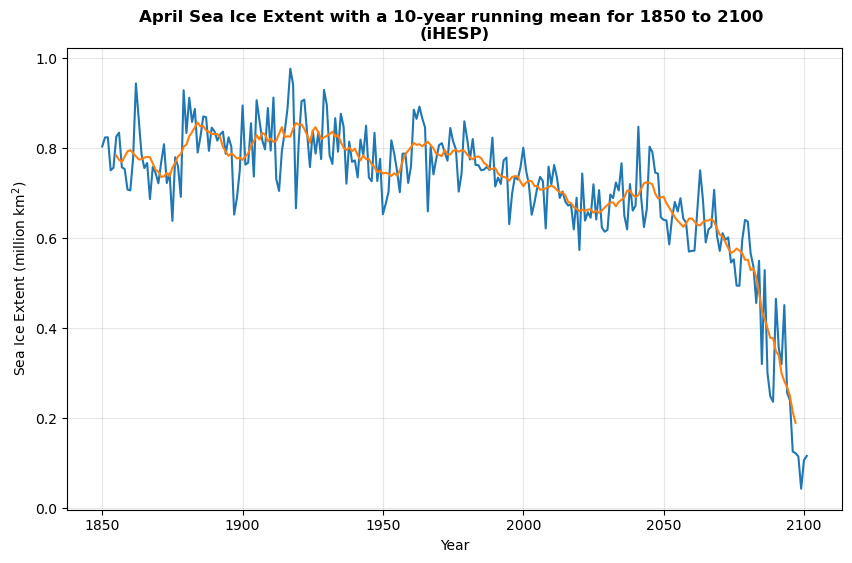

In [41]:
fig, ax=plt.subplots(figsize=(10,6))

april_aice_hist = aice_hist_region.sel(time=slice('1850','2100'))[2::12].sum(('nj', 'ni'))
april_aice_proj = aice_proj_region.sel(time=slice('1850','2100'))[2::12].sum(('nj', 'ni'))
april_aice=xr.concat([april_aice_hist,april_aice_proj], dim='time')

ax.plot(np.arange(1850,2102),april_aice)
ax.plot(np.arange(1850,2102),april_aice.rolling(time=10, center=True).mean())

#rect=ax.add_patch(Rectangle((2050, 0.63), 35, 0.66, edgecolor='red',facecolor='none',lw=2,))
#rect.set_zorder(10)
plt.title('April Sea Ice Extent with a 10-year running mean for 1850 to 2100 \n(iHESP)', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
plt.savefig('April_SIE.jpg',dpi=300, bbox_inches='tight')
plt.show()

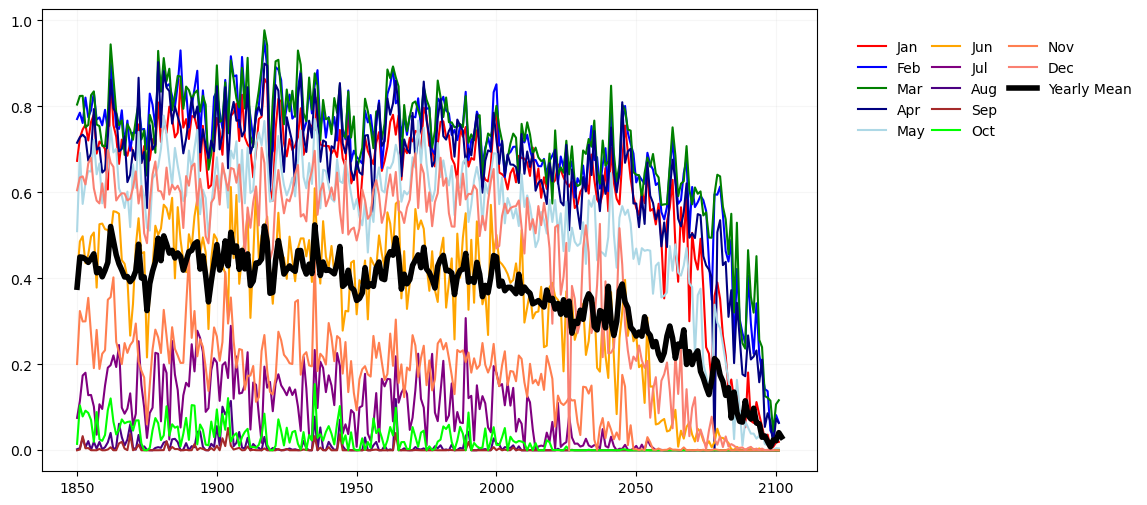

In [34]:
fig, ax=plt.subplots(figsize=(10,6))
# Compute the yearly mean ice area
#yearly_mean = aice_region.groupby('time.year').mean('time')
aice_region_=xr.concat([aice_hist_region,aice_proj_region], dim='time')
yearly_mean = aice_region_.groupby('time.year').mean('time').sum(('nj', 'ni'))


months_datasets = []
for month_idx in range(12):  # 0-based index for January to December
    monthly_aice_hist = aice_hist_region.sel(time=slice('1850','2100'))[month_idx::12].sum(('nj', 'ni'))
    monthly_aice_proj = aice_proj_region.sel(time=slice('1850','2100'))[month_idx::12].sum(('nj', 'ni'))
    monthly_aice = xr.concat([monthly_aice_hist, monthly_aice_proj], dim='time')
    months_datasets.append(monthly_aice)

ax.plot(np.arange(1850,2102), months_datasets[0], label='Jan', color='red')
ax.plot(np.arange(1850,2102), months_datasets[1], label='Feb', color='blue')
ax.plot(np.arange(1850,2102), months_datasets[2], label='Mar', color='green')
ax.plot(np.arange(1850,2102), months_datasets[3], label='Apr', color='navy')
ax.plot(np.arange(1850,2102), months_datasets[4], label='May', color='lightblue')
ax.plot(np.arange(1850,2102), months_datasets[5], label='Jun', color='orange')
ax.plot(np.arange(1850,2102), months_datasets[6], label='Jul', color='purple')
ax.plot(np.arange(1850,2102), months_datasets[7], label='Aug', color='indigo')
ax.plot(np.arange(1850,2102), months_datasets[8], label='Sep', color='brown')
ax.plot(np.arange(1850,2102), months_datasets[9], label='Oct', color='lime')
ax.plot(np.arange(1850,2102), months_datasets[10], label='Nov', color='coral')
ax.plot(np.arange(1850,2100), months_datasets[11], label='Dec', color='Salmon')
ax.plot(np.arange(1850,2103), yearly_mean, label='Yearly Mean', color='black', linewidth=4)
#rect=ax.add_patch(Rectangle((1850, 0.23), 100, 0.08, edgecolor='k',facecolor='None',alpha=0.11,lw=1, ))
#rect.set_zorder(10)
#plt.xticks(np.arange(1850,2100))
plt.grid(alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()

# Create two legends
legend1=plt.legend(handles[:5],labels[:5],loc='upper left',bbox_to_anchor=(1.037, 0.96),frameon=False)
legend2=plt.legend(handles[5:10],labels[5:10],loc='upper left',bbox_to_anchor=(1.133, 0.96),frameon=False)
legend3=plt.legend(handles[10:],labels[10:],loc='upper left',bbox_to_anchor=(1.232, 0.96),frameon=False)


# Add the first legend manually to the current Axes
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.savefig('year-area1.jpg',dpi=300, bbox_inches='tight')
plt.show()

### Sea Ice Concentration

In [35]:
sic_1850_59 = aice_hist_region_.sel(time=slice('1850-01-01','1859-12-31'))
sic_1860_69 = aice_hist_region_.sel(time=slice('1860-01-01','1869-12-31'))
sic_1870_79 = aice_hist_region_.sel(time=slice('1870-01-01','1879-12-31'))
sic_1880_89 = aice_hist_region_.sel(time=slice('1880-01-01','1889-12-31'))
sic_1890_99 = aice_hist_region_.sel(time=slice('1890-01-01','1899-12-31'))
sic_1900_09 = aice_hist_region_.sel(time=slice('1900-01-01','1909-12-31'))
sic_1910_19 = aice_hist_region_.sel(time=slice('1910-01-01','1919-12-31'))
sic_1920_29 = aice_hist_region_.sel(time=slice('1920-01-01','1929-12-31'))
sic_1930_39 = aice_hist_region_.sel(time=slice('1930-01-01','1939-12-31'))
sic_1940_49 = aice_hist_region_.sel(time=slice('1940-01-01','1949-12-31'))
sic_1950_59 = aice_hist_region_.sel(time=slice('1950-01-01','1959-12-31'))
sic_1960_69 = aice_hist_region_.sel(time=slice('1960-01-01','1969-12-31'))
sic_1970_79 = aice_hist_region_.sel(time=slice('1970-01-01','1979-12-31'))
sic_1980_89 = aice_hist_region_.sel(time=slice('1980-01-01','1989-12-31'))
sic_1990_99 = aice_hist_region_.sel(time=slice('1990-01-01','1999-12-31'))
sic_2000_06 = aice_hist_region_.sel(time=slice('2000-01-01','2006-12-31'))
sic_2007_09 = aice_proj_region_.sel(time=slice('2007-01-01','2009-12-31'))
sic_2000_09 = xr.concat([sic_2000_06, sic_2007_09], dim='time')

sic_2010_19 = aice_proj_region_.sel(time=slice('2010-01-01','2019-12-31'))
sic_2020_29 = aice_proj_region_.sel(time=slice('2020-01-01','2029-12-31'))
sic_2030_39 = aice_proj_region_.sel(time=slice('2030-01-01','2039-12-31'))
sic_2040_49 = aice_proj_region_.sel(time=slice('2040-01-01','2049-12-31'))
sic_2050_59 = aice_proj_region_.sel(time=slice('2050-01-01','2059-12-31'))
sic_2060_69 = aice_proj_region_.sel(time=slice('2060-01-01','2069-12-31'))
sic_2070_79 = aice_proj_region_.sel(time=slice('2070-01-01','2079-12-31'))
sic_2080_89 = aice_proj_region_.sel(time=slice('2080-01-01','2089-12-31'))
sic_2090_100 = aice_proj_region_.sel(time=slice('2090-01-01','2100-12-31'))

Execution time:  0.0 hours, 1.0 minutes, 31.185049772262573 seconds


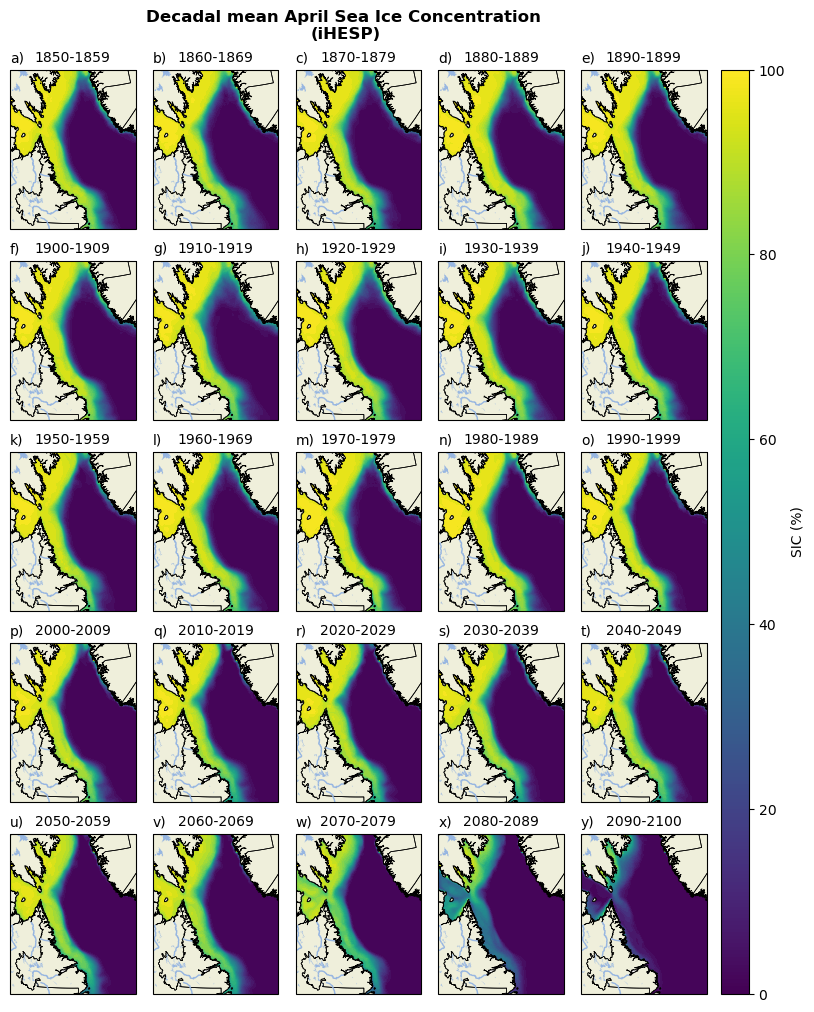

In [53]:
start_time=time.time()

# Create a figure with two subplots
fig = plt.figure(figsize=(10,12))
selected_data = [sic_1850_59, sic_1860_69, sic_1870_79, sic_1880_89, sic_1890_99, sic_1900_09, sic_1910_19,
                 sic_1920_29, sic_1930_39, sic_1940_49, sic_1950_59, sic_1960_69, sic_1970_79, sic_1980_89,
                 sic_1990_99, sic_2000_09, sic_2010_19, sic_2020_29, sic_2030_39, sic_2040_49, sic_2050_59,
                 sic_2060_69, sic_2070_79, sic_2080_89, sic_2090_100]


titles = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']
                 
name=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)',
      'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(5,5, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    if i == 0:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time'),
                    norm=norm, levels=45,transform=ccrs.PlateCarree())
    else:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                    norm=norm, levels=45,transform=ccrs.PlateCarree())
        #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time')*100,
                #colors='red',levels=[15], transform=ccrs.PlateCarree())
    
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
                
cbar_ax = fig.add_axes([0.875, 0.11, 0.028, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  
plt.suptitle('Decadal mean April Sea Ice Concentration \n(iHESP)', fontweight='bold', y=0.93)
plt.subplots_adjust(wspace=-0.3)

#plt.tight_layout()
plt.savefig('Apri_SIC',dpi=300, bbox_inches='tight')

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")